In [1]:
import random
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# # Buka file pickle menggunakan path relatif
# with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_gru_list_tuning.pkl", "rb") as f:
#     cnn_gru_tuning = pickle.load(f)

In [3]:
# # Buka file pickle menggunakan path relatif
# with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_lstm_list_tuning.pkl", "rb") as f:
#     cnn_lstm_tuning = pickle.load(f)

In [4]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list_tuning.pkl", "rb") as f:
    cnn_attention_gru_tuning = pickle.load(f)

In [5]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "rb") as f:
    standard_scaler = pickle.load(f)

In [6]:
standard_scaler

StandardScaler()

In [7]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "rb") as f:
    X_resampling = pickle.load(f)

In [8]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "rb") as f:
    y_resampling = pickle.load(f)

In [9]:
X_resampling = standard_scaler.transform(X_resampling)

In [ ]:
# with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_train.pkl", "wb") as f:
#     pickle.dump(X_train, f)

# with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_test.pkl", "wb") as f:
#     pickle.dump(X_test, f)

# with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_train.pkl", "wb") as f:
#     pickle.dump(y_train, f)

with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_test.pkl", "wb") as f:
    y_test = pickle.load(f)

In [10]:
def XAI_pred(model, random_number):
    print("Data number: ", random_number)
    print("Real Label: ", y_resampling[random_number])

    pred = model.predict(X_resampling[random_number].reshape(1, 24, 1))
    prediction = np.argmax(pred)
    print("Prediction: ", prediction)
    
    analyzer = innvestigate.create_analyzer('input', model)
    relevance = analyzer.analyze(X_resampling[random_number].reshape(1, 24, 1))

    # Ubah ndarray menjadi list
    relevance_list = relevance.squeeze().tolist()

    # Urutkan list secara menurun
    sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

    # Ambil elemen pertama setelah diurutkan
    top_relevance = sorted_relevance[:25]

    # Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
    top_dict = {index: value for index, value in top_relevance}

    print(top_dict)

    total_relevance = sum(top_dict.values())
    print("Total relevance:", total_relevance)

    # Filter nilai yang di atas 0.0 dan ambil indeksnya
    filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

    print(filtered_indices)
    
    relevance_resized = np.resize(relevance, (1, 24, 1))

    plt.figure(figsize=(20, 5))
    plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [11]:
random_number = np.random.randint(0, len(X_resampling))

Model Number:  1
Data number:  3043
Real Label:  6
1/1 [==============================] - 1s 1s/step
Prediction:  5
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


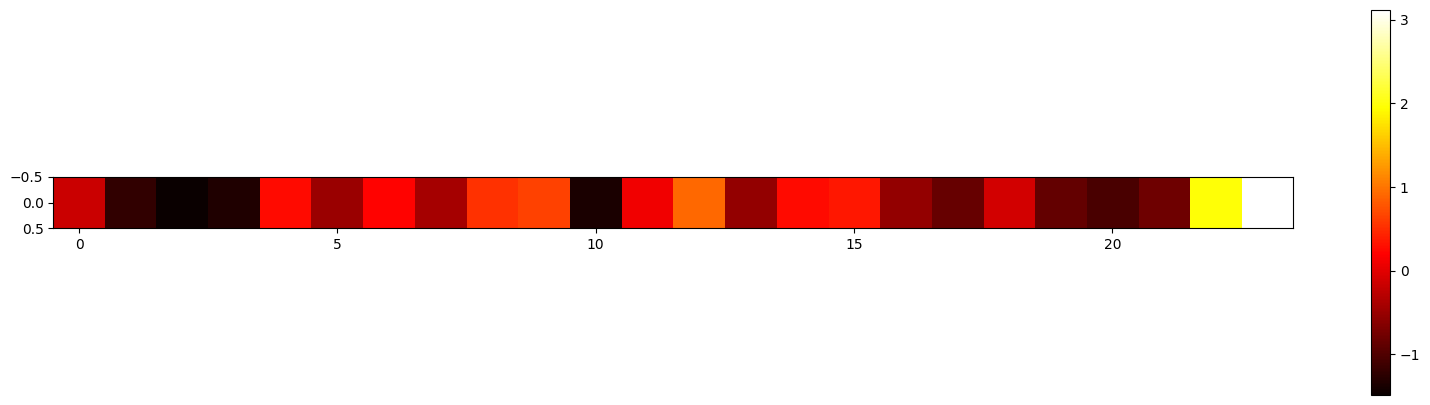

Model Number:  2
Data number:  3043
Real Label:  6
1/1 [==============================] - 1s 990ms/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


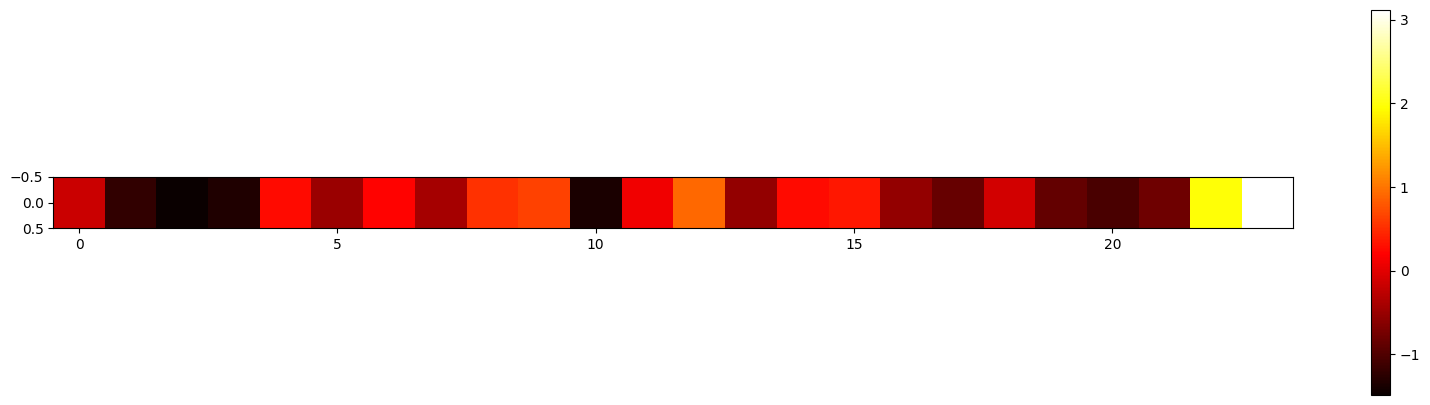

Model Number:  3
Data number:  3043
Real Label:  6
1/1 [==============================] - 1s 996ms/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


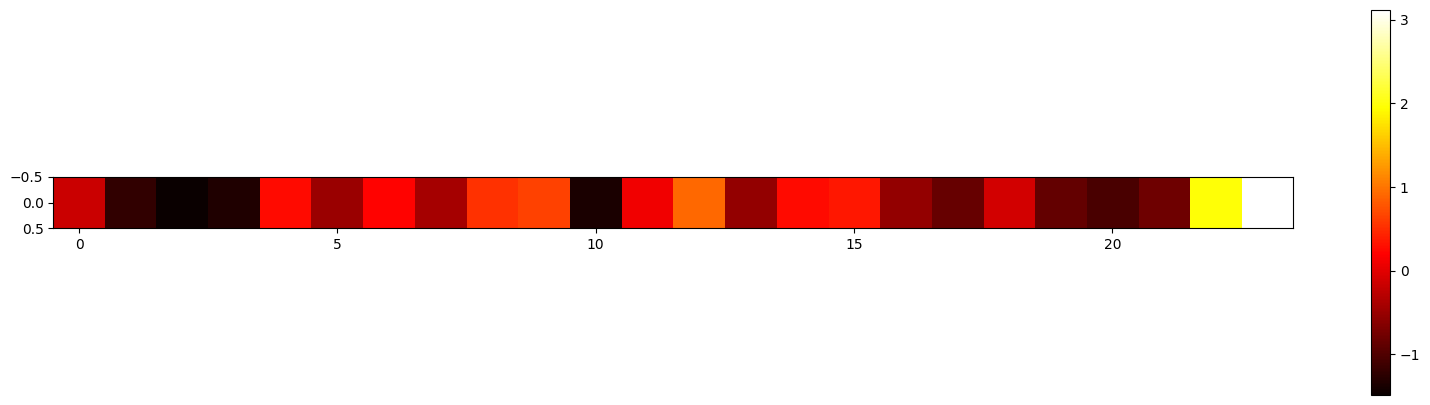

Model Number:  4
Data number:  3043
Real Label:  6
1/1 [==============================] - 1s 1s/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


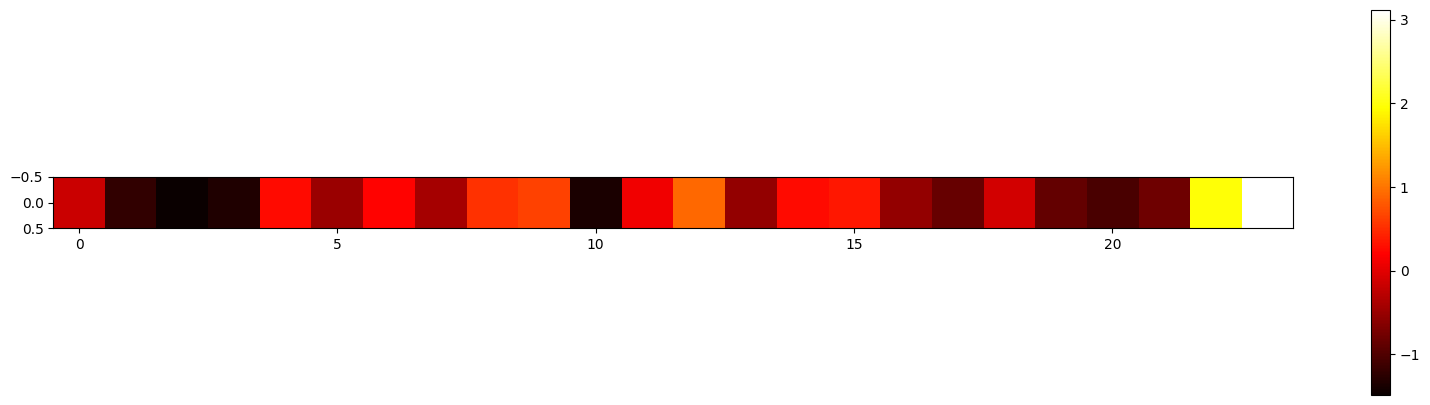

Model Number:  5
Data number:  3043
Real Label:  6
1/1 [==============================] - 1s 1s/step
Prediction:  4
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


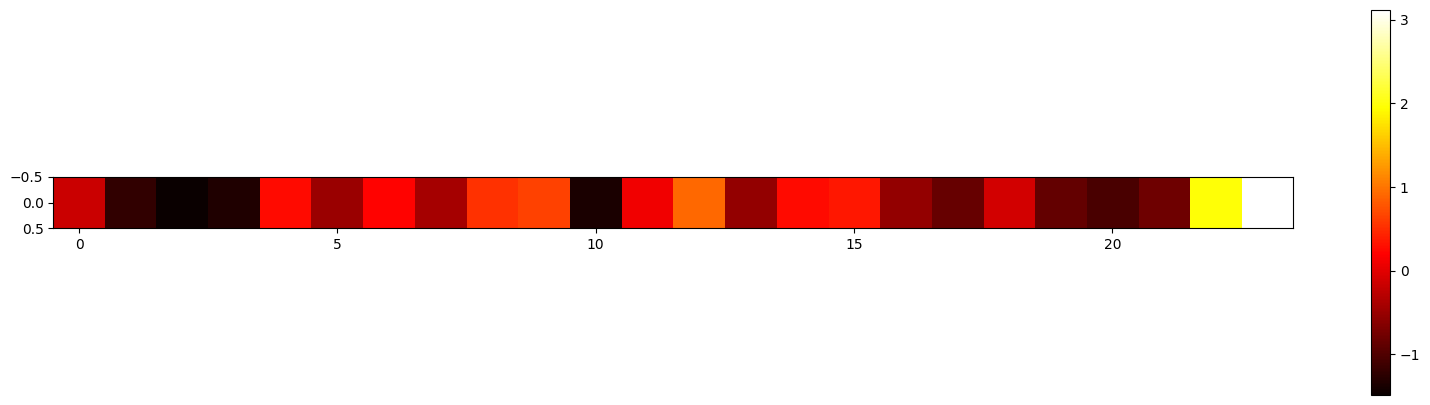

In [12]:
for i, model in enumerate(cnn_attention_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)


In [13]:
for i, model in enumerate(cnn_lstm_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)

NameError: name 'cnn_lstm_tuning' is not defined

Model Number:  1
Data number:  3043
Real Label:  6
1/1 [==============================] - 0s 66ms/step
Prediction:  5
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


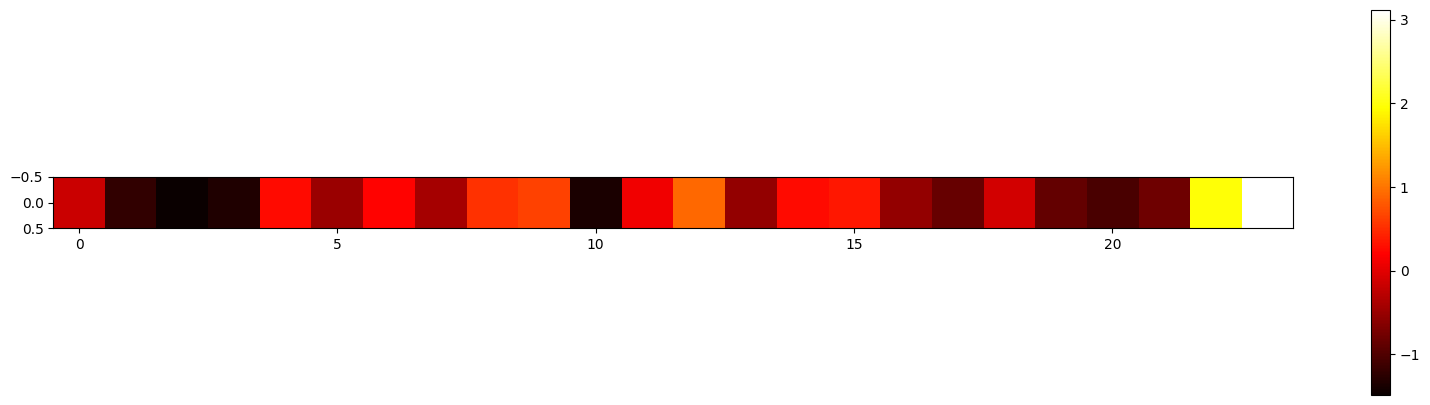

Model Number:  2
Data number:  3043
Real Label:  6
1/1 [==============================] - 0s 34ms/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


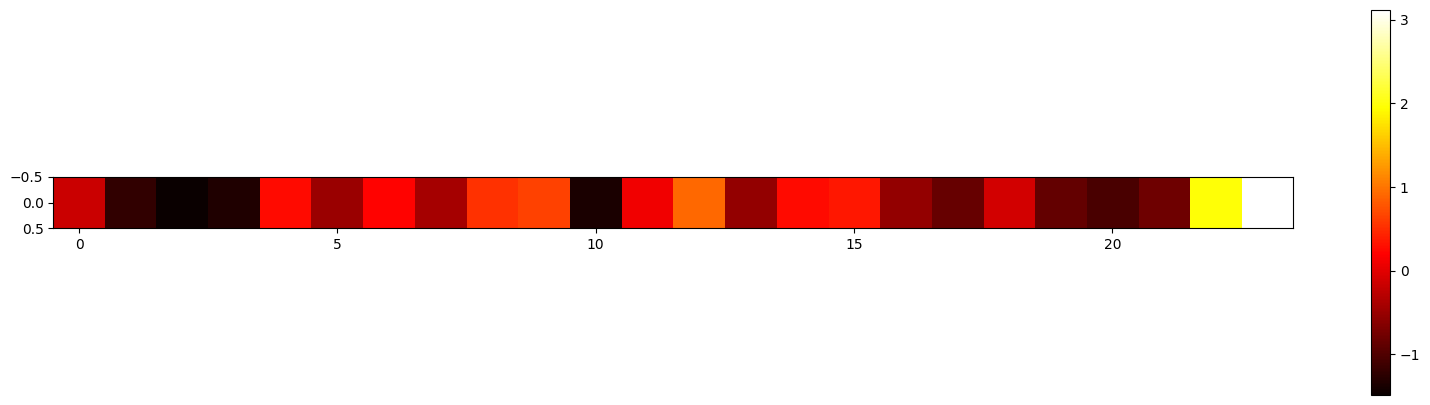

Model Number:  3
Data number:  3043
Real Label:  6
1/1 [==============================] - 0s 31ms/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


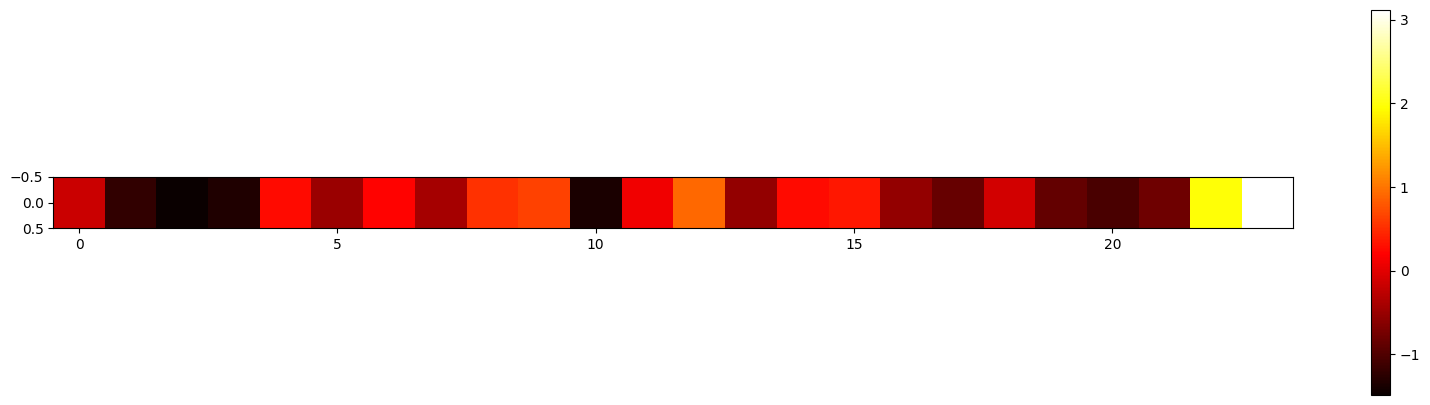

Model Number:  4
Data number:  3043
Real Label:  6
1/1 [==============================] - 0s 27ms/step
Prediction:  6
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


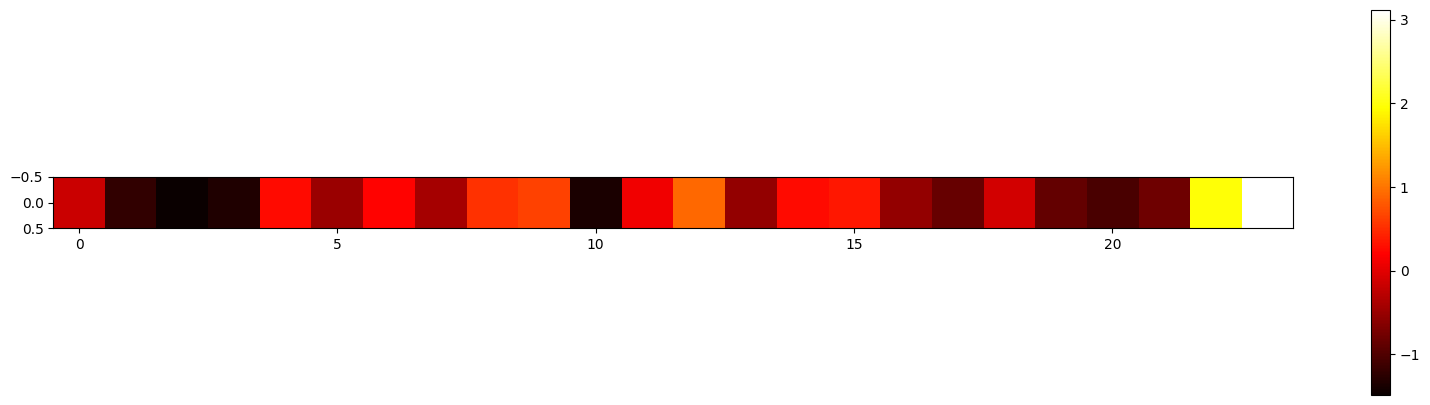

Model Number:  5
Data number:  3043
Real Label:  6
1/1 [==============================] - 0s 26ms/step
Prediction:  4
{23: 3.116117238998413, 22: 1.970826268196106, 12: 0.9207730293273926, 9: 0.6377969980239868, 8: 0.5332579612731934, 15: 0.3505994379520416, 4: 0.272845983505249, 14: 0.267679363489151, 6: 0.21680405735969543, 11: 0.10519855469465256, 18: -0.11280670017004013, 0: -0.1609940230846405, 7: -0.4077669084072113, 5: -0.4937678575515747, 13: -0.5440207123756409, 16: -0.5468319058418274, 21: -0.7954104542732239, 17: -0.8457306623458862, 19: -0.8589661717414856, 20: -1.0366195440292358, 1: -1.2088435888290405, 3: -1.3302929401397705, 10: -1.3663078546524048, 2: -1.4842907190322876}
Total relevance: -2.8007511496543884
[4, 6, 8, 9, 11, 12, 14, 15, 22, 23]


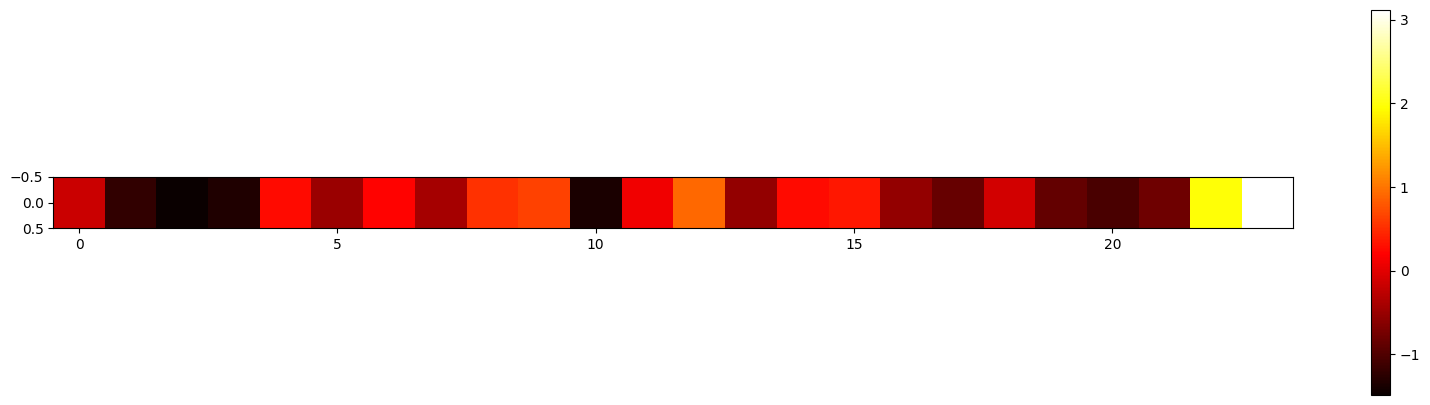

In [14]:
for i, model in enumerate(cnn_attention_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)


In [15]:
def calculate_avg_relevance(model, X_resampling, y_resampling):
    correct_predictions = []
    
    for i in range(len(X_resampling)):
        pred = model.predict(X_resampling[i].reshape(1, -1, 1))
        prediction = np.argmax(pred)
        
        if prediction == y_resampling[i]:
            correct_predictions.append((i, prediction))
    
    # Kelompokkan berdasarkan label yang benar
    grouped_indices = {}
    for idx, label in correct_predictions:
        if label not in grouped_indices:
            grouped_indices[label] = []
        grouped_indices[label].append(idx)
    
    # Rata-rata relevansi untuk masing-masing label
    avg_relevances = {}
    
    for label, indices in grouped_indices.items():
        relevances = []
        for idx in indices:
            analyzer = innvestigate.create_analyzer('input', model)
            relevance = analyzer.analyze(X_resampling[idx].reshape(1, -1, 1))
            relevances.append(relevance.squeeze())
        
        avg_relevance = np.mean(relevances, axis=0)
        avg_relevances[label] = avg_relevance
    
    return avg_relevances

In [16]:
# def display_top_relevance_features(avg_relevances, top_n=5):
#     for label, avg_relevance in avg_relevances.items():
#         print(f"Label: {label}")
        
#         # Urutkan relevansi dan ambil top_n tertinggi
#         sorted_relevance = sorted(enumerate(avg_relevance), key=lambda x: x[1], reverse=True)
#         top_relevance = sorted_relevance[:top_n]
        
#         top_dict = {index: value for index, value in top_relevance}
#         print("Top relevance features:", top_dict)
        
#         # Plot relevansi rata-rata
#         plt.figure(figsize=(10, 2))
#         plt.bar(range(len(avg_relevance)), avg_relevance, label=f'Label {label}')
#         plt.xlabel('Fitur')
#         plt.ylabel('Rata-rata Relevansi')
#         plt.title(f'Relevansi Rata-rata Fitur untuk Label {label}')
#         plt.legend()
#         plt.show()

In [19]:
def display_top_relevance_features(avg_relevances, top_n=5):
    feature_names = ['Min RR', 'Max RR', 'AVG RR', 'Median RR', 'Skew RR', 'Kurtosis RR', 
                     'Min PR', 'Max PR', 'AVG PR', 'Median PR', 'Skew PR', 'Kurtosis PR', 
                     'Min QT', 'Max QT', 'AVG QT', 'Median QT', 'Skew QT', 'Kurtosis QT', 
                     'Min QRS', 'Max QRS', 'AVG QRS', 'Median QRS', 'Skew QRS', 'Kurtosis QRS']
    
    labels = ['/', 'A', 'F', 'L', 'N', 'R', 'V', 'j', 'x', '|']

    for label, avg_relevance in avg_relevances.items():
        print(f"Label: {labels[label]}")
        
        # Urutkan relevansi dan ambil top_n tertinggi
        sorted_relevance = sorted(enumerate(avg_relevance), key=lambda x: x[1], reverse=True)
        top_relevance = sorted_relevance[:top_n]
        
        top_dict = {index: value for index, value in top_relevance}
        print("Top relevance features:", top_dict)
        
        # Plot relevansi rata-rata
        plt.figure(figsize=(10, 8))
        colors = ['red' if value > 0 else 'blue' for value in avg_relevance]
        plt.barh(range(len(avg_relevance)), avg_relevance, color=colors)
        plt.xlabel('Average Relevance')
        plt.ylabel('Feature')
        plt.title(f'Average Feature Relevance for Label {labels[label]}')
        plt.gca().invert_yaxis()  # Invert y-axis to display the highest relevance at the top
        plt.yticks(range(len(feature_names)), feature_names)  # Set feature names as tick labels
        plt.show()

1/1 [==============================] - 0s 48ms/step
Label: A
Top relevance features: {1: 0.66868865, 23: 0.4136206, 22: 0.31754494, 4: 0.18460986, 17: 0.0072163176}


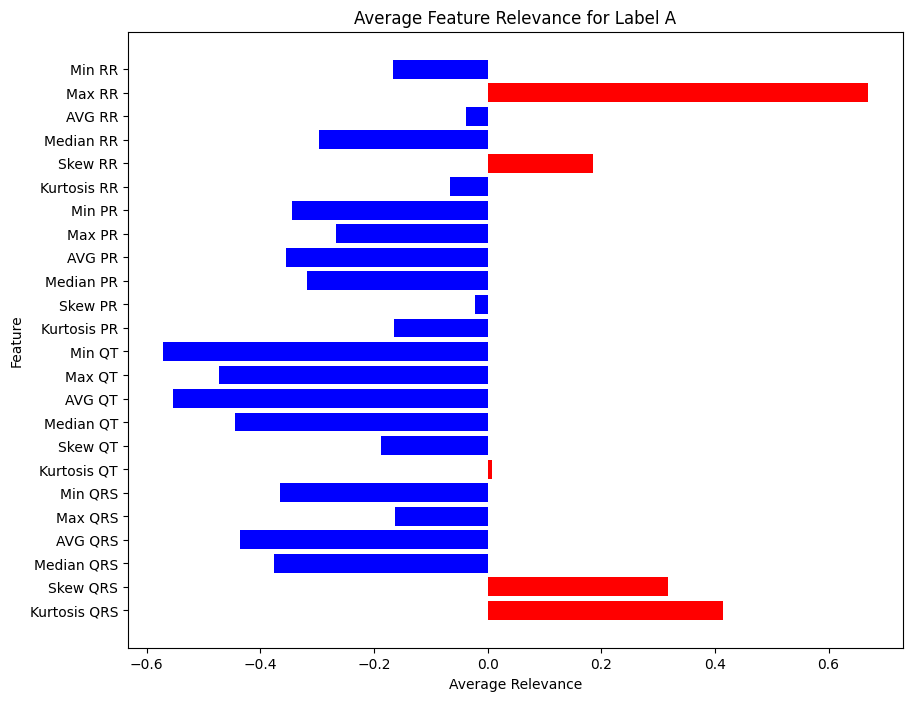

Label: N
Top relevance features: {0: 0.5120233, 12: 0.35743624, 18: 0.29952288, 17: 0.27881905, 6: 0.26741982}


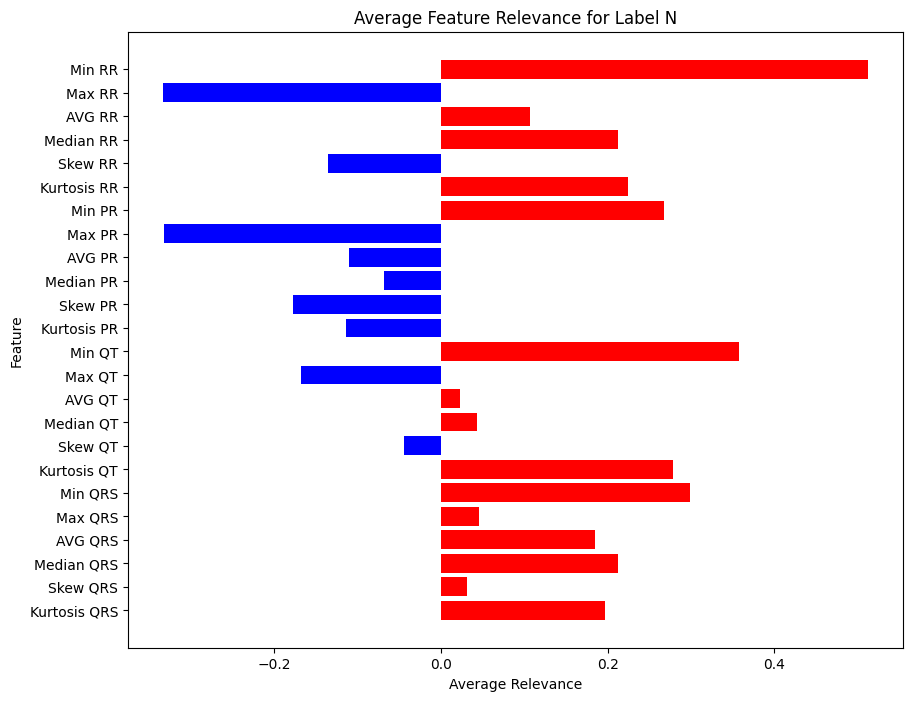

Label: V
Top relevance features: {15: 0.30929446, 14: 0.30129126, 13: 0.20992334, 22: 0.14614423, 7: 0.14226526}


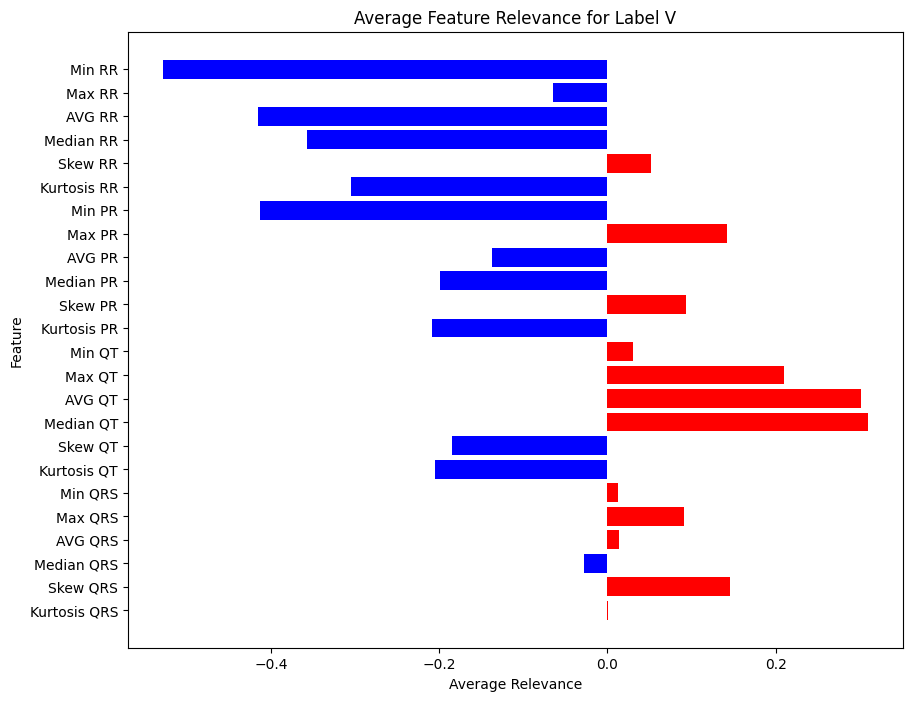

Label: |
Top relevance features: {16: 0.7236834, 11: 0.43730152, 17: 0.37447017, 21: 0.34815124, 20: 0.346989}


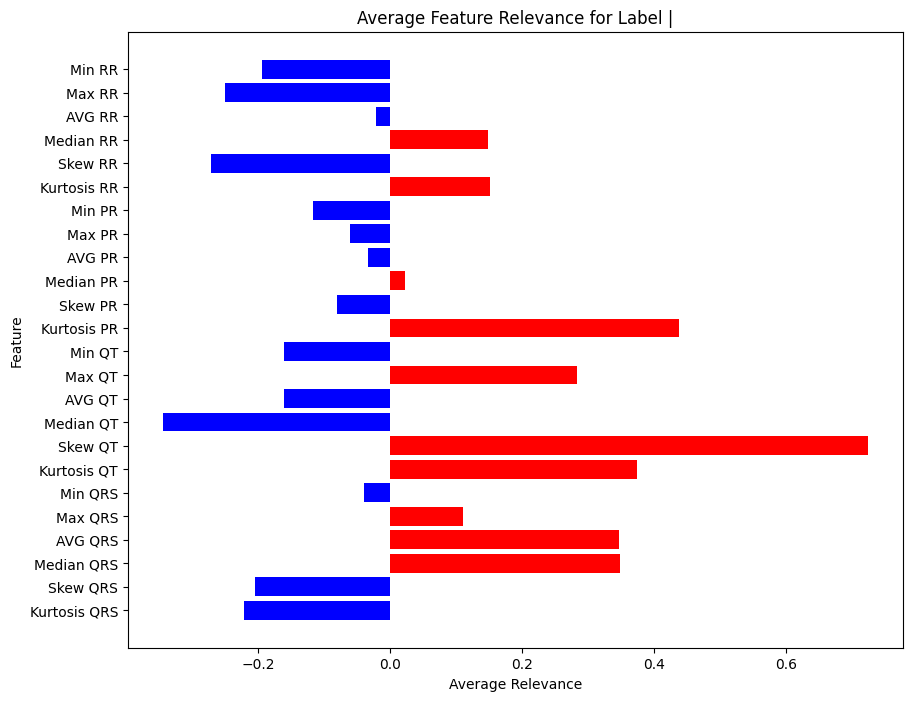

Label: /
Top relevance features: {0: 0.9406323, 21: 0.65245444, 20: 0.5301528, 12: 0.5273395, 17: 0.5015786}


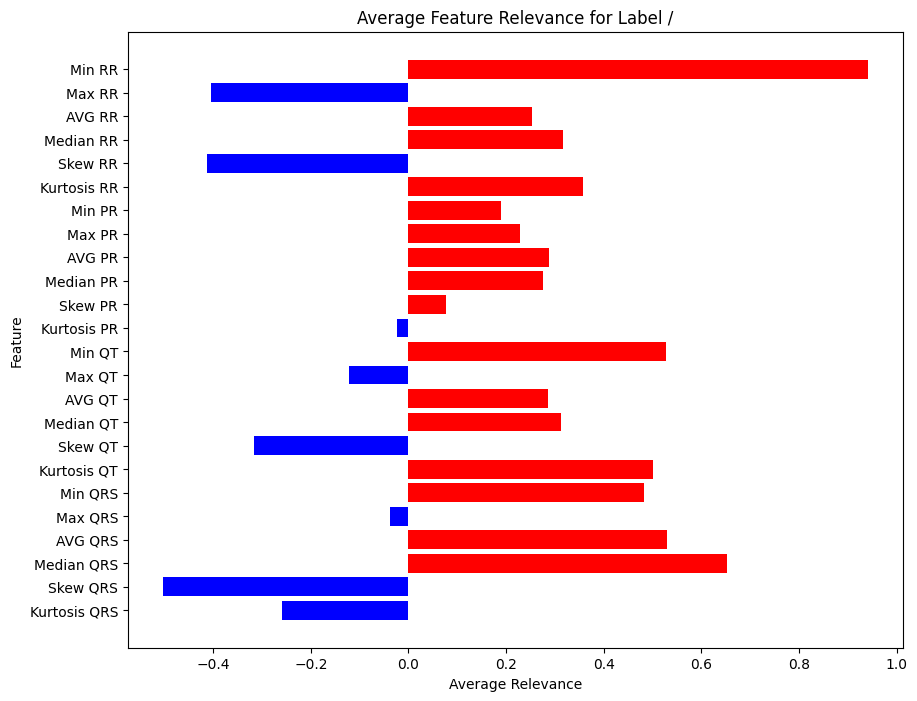

Label: F
Top relevance features: {11: 0.7321484, 5: 0.70645255, 4: 0.64167756, 22: 0.6218014, 15: 0.4448762}


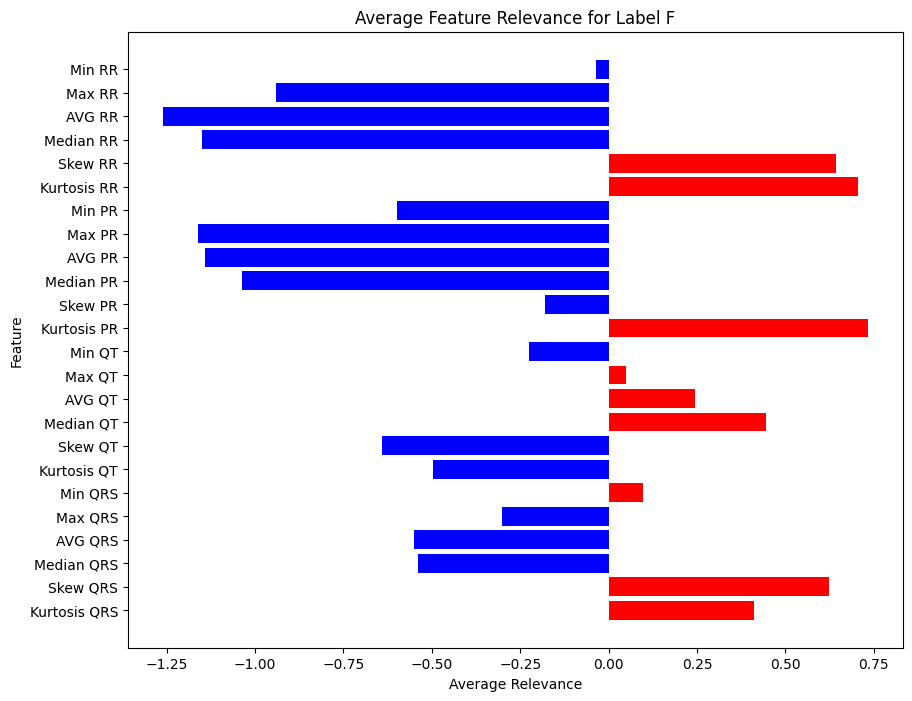

Label: j
Top relevance features: {1: 0.42814505, 10: 0.3080064, 4: 0.14881913, 16: 0.04090427, 7: 0.0153001975}


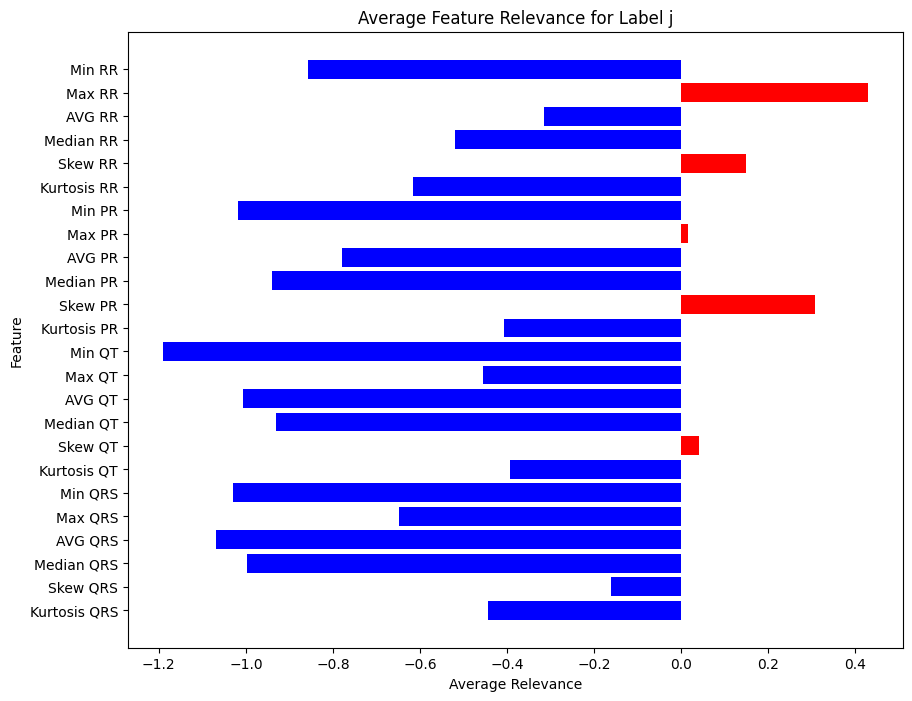

Label: L
Top relevance features: {9: 0.85893494, 8: 0.7333693, 12: 0.56815964, 18: 0.4971195, 6: 0.48420405}


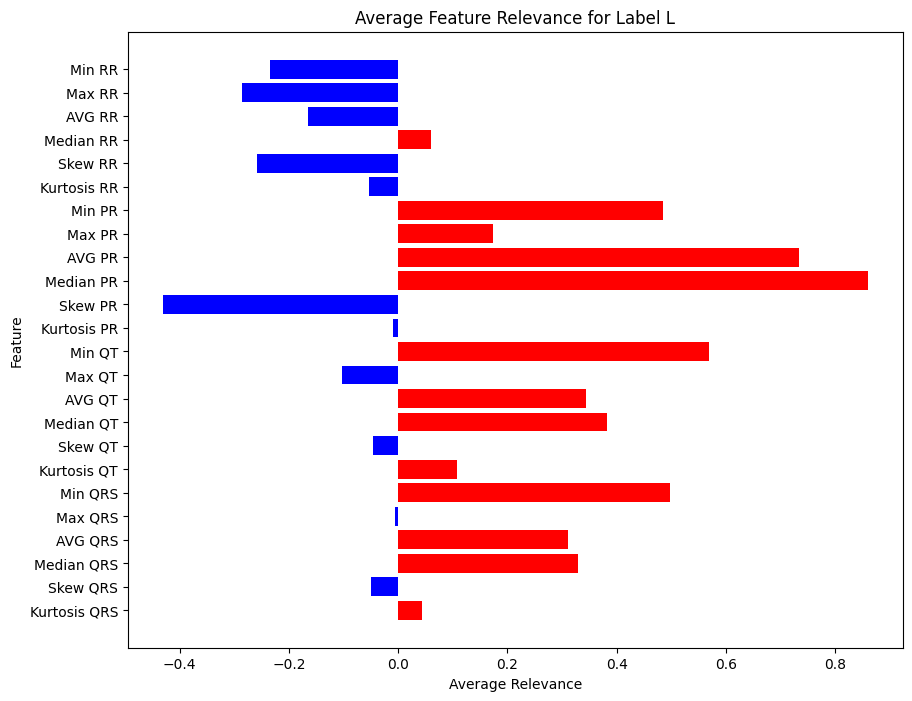

Label: R
Top relevance features: {0: 0.4321131, 10: 0.41051093, 16: 0.3781242, 3: 0.376956, 21: 0.35988086}


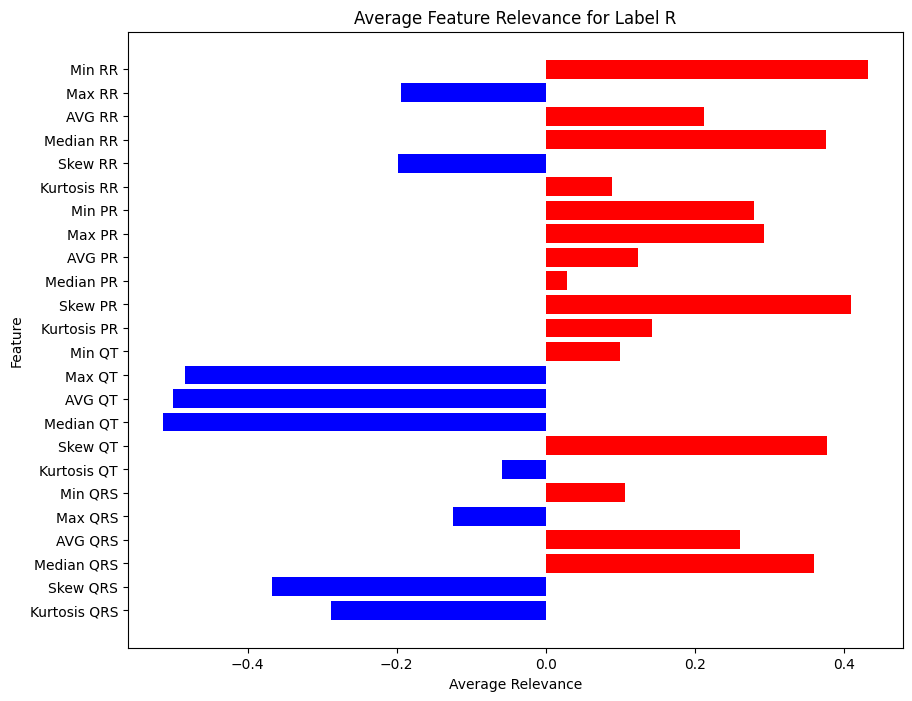

Label: x
Top relevance features: {2: 1.6481719, 8: 1.419626, 9: 1.3854425, 1: 1.3854138, 6: 1.278134}


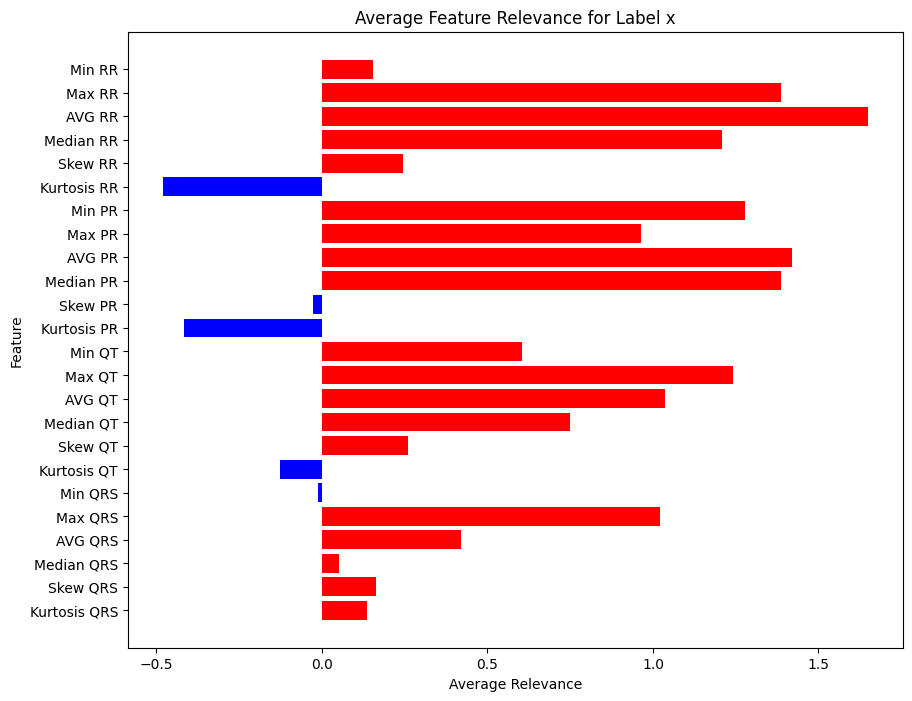

In [20]:
avg_relevance = calculate_avg_relevance(cnn_attention_gru_tuning[4], X_resampling, y_resampling)
display_top_relevance_features(avg_relevance)